## Reporte Aeropuertos de México

#### Código
Esta primer parte contiene todo el código necesario para que el cuaderno funcione.

In [1]:
#Importar librerías y configuración inicial
import pandas as pd
import folium
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (16,9)

In [2]:
#Cargar los datos
ac = pd.read_csv('./airports-extended.csv')
ac = ac[ac["country"]== "Mexico"]
a = pd.read_html("https://es.wikipedia.org/wiki/Anexo:Aeropuertos_de_M%C3%A9xico")

In [4]:
# Ubicación inicial del mapa
start_location_lat = ac[ac['country']=='Mexico']['lat'].median()
start_location_long = ac[ac['country']=='Mexico']['long'].median()

In [21]:
# AEROPUERTOS INTERNACIONALES
m_i = folium.Map(location =[start_location_lat, start_location_long], zoom_start=4)

asa = folium.FeatureGroup(name="ASA")
oma = folium.FeatureGroup(name="OMA")
gap = folium.FeatureGroup(name="GAP")
asur = folium.FeatureGroup(name="ASUR")
gacm = folium.FeatureGroup(name="GACM")
otros = folium.FeatureGroup(name="otros")

for row in ai[ai['Operador']=='ASA'].itertuples():
    folium.Marker([row.lat,row.long] , tooltip = row.name, icon = folium.Icon(color='blue')).add_to(asa)
for row in ai[ai['Operador']=='OMA'].itertuples():
    folium.Marker([row.lat,row.long] , tooltip = row.name, icon = folium.Icon(color='red')).add_to(oma)
for row in ai[ai['Operador']=='GAP'].itertuples():
    folium.Marker([row.lat,row.long] , tooltip = row.name, icon = folium.Icon(color='green')).add_to(gap)
for row in ai[ai['Operador']=='ASUR'].itertuples():
    folium.Marker([row.lat,row.long] , tooltip = row.name, icon = folium.Icon(color='orange')).add_to(asur)
for row in ai[ai['Operador']=='GACM'].itertuples():
    folium.Marker([row.lat,row.long] , tooltip = row.name, icon = folium.Icon(color='purple')).add_to(gacm)
for row in ai[~(ai['Operador'].isin(["ASA", "OMA", "GAP", "ASUR", "GACM"]))].itertuples():
    folium.Marker([row.lat,row.long] , tooltip = row.name, icon = folium.Icon(color='black')).add_to(otros)



In [23]:
# AEROPUERTOS NACIONALES
nacionales = a[5]
nacionales.columns = nacionales.columns.droplevel()
an = ac.merge(nacionales[["Operador","IATA"]], left_on="code3", right_on="IATA")

m_n = folium.Map(location =[start_location_lat, start_location_long], zoom_start=4)

asa = folium.FeatureGroup(name="ASA")
oma = folium.FeatureGroup(name="OMA")
gap = folium.FeatureGroup(name="GAP")
asur = folium.FeatureGroup(name="ASUR")
gacm = folium.FeatureGroup(name="GACM")
otros = folium.FeatureGroup(name="otros")

for row in an[an['Operador']=='ASA'].itertuples():
    folium.Marker([row.lat,row.long] , tooltip = row.name, icon = folium.Icon(color='blue')).add_to(asa)
for row in an[an['Operador']=='OMA'].itertuples():
    folium.Marker([row.lat,row.long] , tooltip = row.name, icon = folium.Icon(color='red')).add_to(oma)
for row in an[an['Operador']=='GAP'].itertuples():
    folium.Marker([row.lat,row.long] , tooltip = row.name, icon = folium.Icon(color='green')).add_to(gap)
for row in an[an['Operador']=='ASUR'].itertuples():
    folium.Marker([row.lat,row.long] , tooltip = row.name, icon = folium.Icon(color='orange')).add_to(asur)
for row in an[an['Operador']=='GACM'].itertuples():
    folium.Marker([row.lat,row.long] , tooltip = row.name, icon = folium.Icon(color='purple')).add_to(gacm)
for row in ai[~(ai['Operador'].isin(["ASA", "OMA", "GAP", "ASUR", "GACM"]))].itertuples():
    folium.Marker([row.lat,row.long] , tooltip = row.name, icon = folium.Icon(color='black')).add_to(otros)

In [ ]:
#Estimaciones vuelo
cancun = {
	"DFW":{
		"fpw": 77,
		"2020": 253000
	},
	"PTY":{
		"fpw": 55,
		"2020": 100000
	},
	"IAH":{
		"fpw": 52,
		"2020": 253000
	},
	"MIA":{
		"fpw": 49,
		"2020": 145000
	},
	"ORD":{
		"fpw": 49,
		"2020": 250000
	},
	"ATL":{
		"fpw": 48,
		"2020": 153000
	},
	"JFK":{
		"fpw": 40,
		"2020": 148000
	}
}

## Reporte

En esta sección mostramos los resultados en una manera más sencilla de entender junto con interpretaciones principales de los datos

Según los datos obtenidos, en el 2020 hubo más de 19 millones de vuelos internacionales. Y en caso de digitalizar algún proceso, el impacto sería el siguiente:
- ### Ahorros de 4.5 - 9 MDP
- ### +19 millones de hojas de papel ahorrado
- ### 

19690389


<AxesSubplot:xlabel='2020', ylabel='Aeropuerto'>

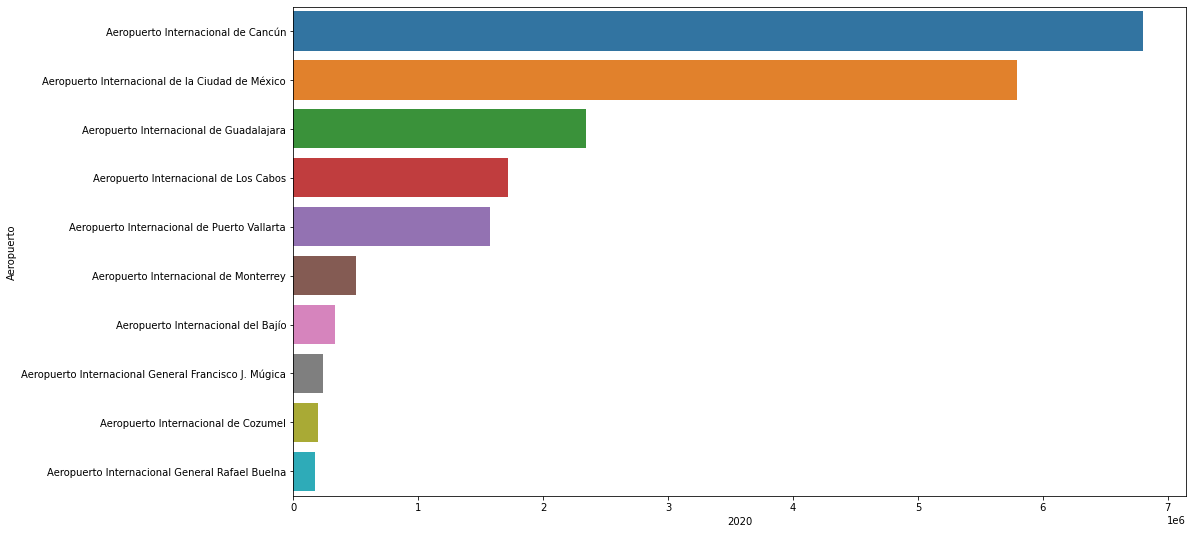

In [28]:
# Total Vuelos internacionales
vuelos_internacionales=a[11]
print (sum(vuelos_internacionales['2020']))
sns.barplot(y=vuelos_internacionales["Aeropuerto"], x=vuelos_internacionales["2020"])

<AxesSubplot:xlabel='IATA', ylabel='2020[12]\u200b'>

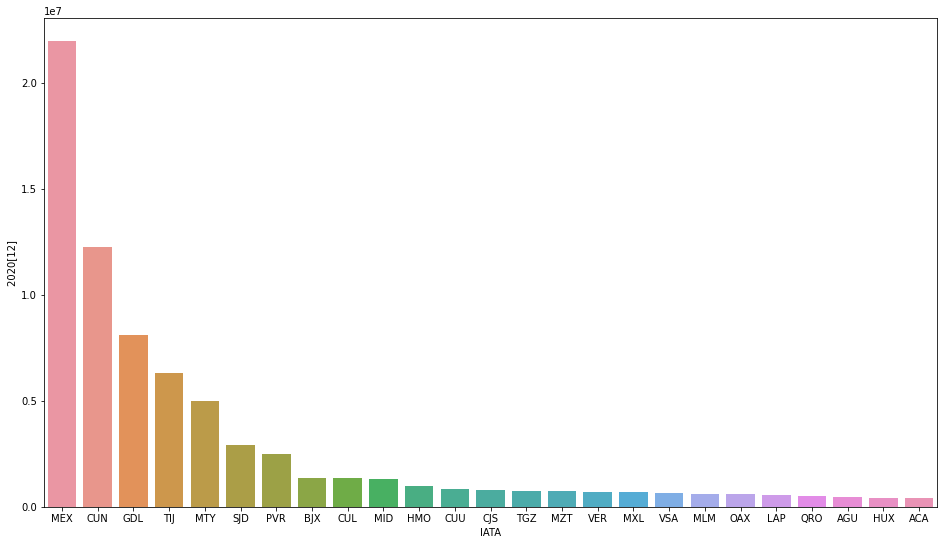

In [11]:
## Transporte nacional
vuelos_nacionales= a[10]
sns.barplot(x=vuelos_nacionales["IATA"], y=vuelos_nacionales["2020[12]\u200b"])

<AxesSubplot:xlabel='2020', ylabel='Aeropuerto'>

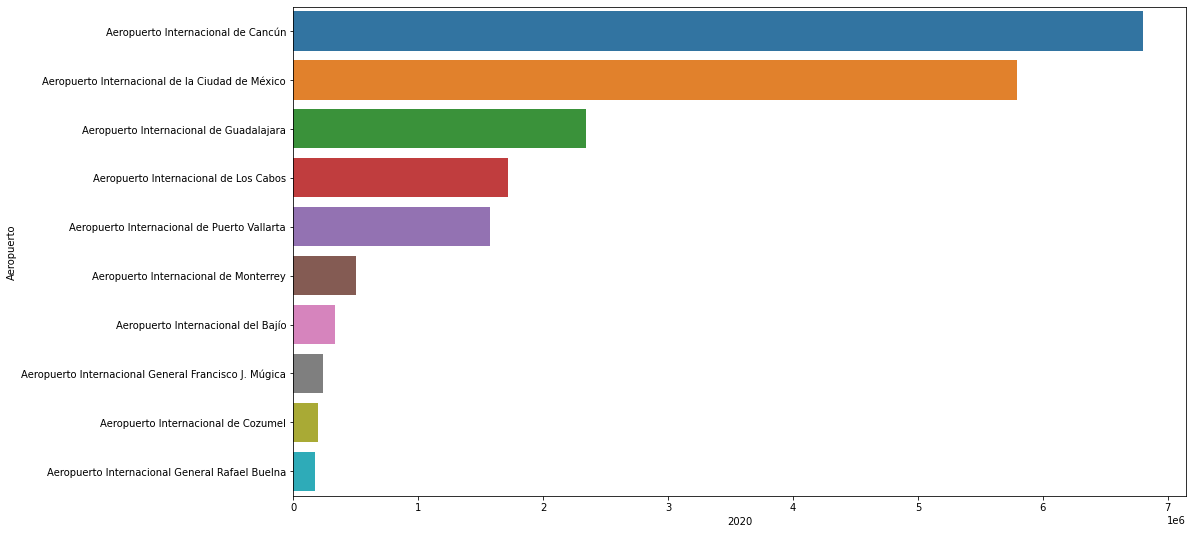

In [12]:
vuelos_internacionales=a[11]
sns.barplot(y=vuelos_internacionales["Aeropuerto"], x=vuelos_internacionales["2020"])

In [22]:
# Mapa aeropuertos internacionales
m_i.add_child(asa)
m_i.add_child(oma)
m_i.add_child(gap)
m_i.add_child(asur)
m_i.add_child(gacm)
m_i.add_child(otros)

m_i.add_child(folium.map.LayerControl())

In [24]:
#Mapa Aeropuertos nacionales
m_n.add_child(asa)
m_n.add_child(oma)
m_n.add_child(gap)
m_n.add_child(asur)
m_n.add_child(gacm)
m_n.add_child(otros)

m_n.add_child(folium.map.LayerControl())